# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Create empty lists for the data we need to store.
city_two = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Sets and Counts for API calls
count_one = 0
set_one = 1

#For Loop to gather Weather Information
for city in cities:
    try:
        city_url = query_url + city
        response = requests.get(city_url).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else: 
            count_one += 1
            city_two.append(city)
        print(f"Retrieving Record {count_one} of Set {set_one} for City: {city}")
    except KeyError:
        print("City Not Found. Skipping...")
        
print("Data Retrieval Completed.")

Retrieving Record 1 of Set 1 for City: westport
Retrieving Record 2 of Set 1 for City: rikitea
Retrieving Record 3 of Set 1 for City: port alfred
Retrieving Record 4 of Set 1 for City: kenora
Retrieving Record 5 of Set 1 for City: gengenbach
Retrieving Record 6 of Set 1 for City: kerouane
Retrieving Record 7 of Set 1 for City: saint-philippe
Retrieving Record 8 of Set 1 for City: ushuaia
Retrieving Record 9 of Set 1 for City: monteiro
Retrieving Record 10 of Set 1 for City: albany
Retrieving Record 11 of Set 1 for City: alofi
Retrieving Record 12 of Set 1 for City: hermanus
Retrieving Record 13 of Set 1 for City: punta arenas
Retrieving Record 14 of Set 1 for City: kununurra
Retrieving Record 15 of Set 1 for City: busselton
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
Retrieving Record 16 of Set 1 for City: lebu
Retrieving Record 17 of Set 1 for City: tiksi
Retrieving Record 18 of Set 1 for City: pineville
Retrieving Record 19 of Set 1 for City: d

Retrieving Record 11 of Set 4 for City: barrow
Retrieving Record 12 of Set 4 for City: lagodekhi
Retrieving Record 13 of Set 4 for City: abu kamal
Retrieving Record 14 of Set 4 for City: malaya serdoba
Retrieving Record 15 of Set 4 for City: sechelt
Retrieving Record 16 of Set 4 for City: lorengau
Retrieving Record 17 of Set 4 for City: sur
Retrieving Record 18 of Set 4 for City: brownsville
Retrieving Record 19 of Set 4 for City: dukat
Retrieving Record 20 of Set 4 for City: geraldton
Retrieving Record 21 of Set 4 for City: zelenodolsk
City Not Found. Skipping...
Retrieving Record 22 of Set 4 for City: russell
Retrieving Record 23 of Set 4 for City: majitha
Retrieving Record 24 of Set 4 for City: ahipara
Retrieving Record 25 of Set 4 for City: menongue
Retrieving Record 26 of Set 4 for City: chengde
Retrieving Record 27 of Set 4 for City: valparaiso
City Not Found. Skipping...
Retrieving Record 28 of Set 4 for City: ambilobe
Retrieving Record 29 of Set 4 for City: mozarlandia
Retrievi

Retrieving Record 21 of Set 7 for City: sept-iles
Retrieving Record 22 of Set 7 for City: karangasem
Retrieving Record 23 of Set 7 for City: husavik
Retrieving Record 24 of Set 7 for City: stettler
Retrieving Record 25 of Set 7 for City: mareeba
Retrieving Record 26 of Set 7 for City: podgornoye
Retrieving Record 27 of Set 7 for City: trinidad
Retrieving Record 28 of Set 7 for City: santiago del estero
Retrieving Record 29 of Set 7 for City: union hidalgo
City Not Found. Skipping...
Retrieving Record 30 of Set 7 for City: grindavik
Retrieving Record 31 of Set 7 for City: san patricio
Retrieving Record 32 of Set 7 for City: ekibastuz
Retrieving Record 33 of Set 7 for City: quelimane
Retrieving Record 34 of Set 7 for City: san cristobal
Retrieving Record 35 of Set 7 for City: bosaso
Retrieving Record 36 of Set 7 for City: san policarpo
Retrieving Record 37 of Set 7 for City: melendugno
Retrieving Record 38 of Set 7 for City: nantucket
Retrieving Record 39 of Set 7 for City: vega de alato

Retrieving Record 30 of Set 10 for City: meulaboh
Retrieving Record 31 of Set 10 for City: peniche
Retrieving Record 32 of Set 10 for City: tashara
Retrieving Record 33 of Set 10 for City: nueva concepcion
Retrieving Record 34 of Set 10 for City: deputatskiy
Retrieving Record 35 of Set 10 for City: gimbi
Retrieving Record 36 of Set 10 for City: beloha
Retrieving Record 37 of Set 10 for City: isangel
Retrieving Record 38 of Set 10 for City: vestmanna
Retrieving Record 39 of Set 10 for City: lagos
Retrieving Record 40 of Set 10 for City: ponta delgada
Retrieving Record 41 of Set 10 for City: novoagansk
Retrieving Record 42 of Set 10 for City: marsh harbour
Retrieving Record 43 of Set 10 for City: trofors
Retrieving Record 44 of Set 10 for City: damghan
Retrieving Record 45 of Set 10 for City: mineral wells
Retrieving Record 46 of Set 10 for City: haines junction
Retrieving Record 47 of Set 10 for City: puerto madryn
Retrieving Record 48 of Set 10 for City: lincoln
Retrieving Record 49 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create a Dictionary for the DataFrame
weather_dict = {"City": city_two,
               "Cloudiness": cloudiness,
               "Country": country,
               "Date": date,
               "Humidity": humidity,
               "Lat": lat,
               "Lng": lng,
               "Max Temp": max_temp,
               "Wind Speed": wind_speed}

#Create DataFrame
weather_data = pd.DataFrame(weather_dict)

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,westport,1,US,1619266475,50,41.1415,-73.3579,53.01,6.91
1,rikitea,100,PF,1619266186,78,-23.1203,-134.9692,76.41,10.98
2,port alfred,23,ZA,1619266475,52,-33.5906,26.8910,75.47,13.89
3,kenora,20,CA,1619266316,58,49.8167,-94.4337,23.00,3.44
4,gengenbach,10,DE,1619266476,36,48.4000,8.0167,68.00,3.00


In [5]:
weather_data.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [6]:
#Export the City Data into a .csv
weather_data.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.

humidity_stats = weather_data['Humidity'].describe()

print("The statistics for the Humidity column show the maximum as 100%. There are no cities with humidity over 100%.")
print(humidity_stats)


The statistics for the Humidity column show the maximum as 100%. There are no cities with humidity over 100%.
count    558.000000
mean      67.358423
std       24.076491
min        4.000000
25%       54.250000
50%       73.500000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

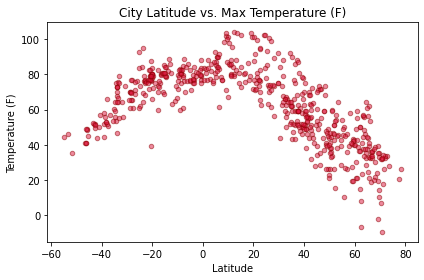

In [13]:
#Create the Scatter Plot for Latitude vs. Max Temperature
weather_data.plot(kind='scatter', x ='Lat', y='Max Temp', marker='o', color='crimson', edgecolor='darkred', alpha=0.5)

#Define Labels
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Max Temperature (F)")

plt.tight_layout()

#Save the plot as a .png
plt.savefig("../Images/Latitude_MaxTemp.png")

This scatter plot analyzes the relationship between Latitude and Temperature (F) for the list of cities. Looking at this scatter plot, it would seem that,Temperature (F) increases as the city becomes closer to the equator. 

## Latitude vs. Humidity Plot

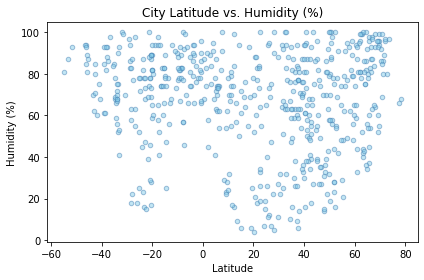

In [58]:
#Create the Scatter Plot for Latitude vs. Humidity
weather_data.plot(kind='scatter', x ='Lat', y='Humidity', marker='o', color='skyblue', 
                  edgecolor='steelblue', alpha=0.5)

#Define Labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%)")

plt.tight_layout()

#Save the plot as a .png
plt.savefig("../Images/Latitude_Humidity.png")

This scatter plot analyzes the relationship between Latitude and Humidity for the list of cities. There does not seem to be a strong relationship here while looking at both the Southern and Northern hemisphere. Breaking this into two separate charts below may provide more information on any possible relationships. 

## Latitude vs. Cloudiness Plot

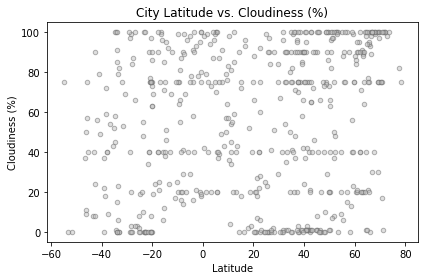

In [57]:
#Create the Scatter Plot for Latitude vs. Cloudiness
weather_data.plot(kind='scatter', x ='Lat', y='Cloudiness', marker='o', color='silver', 
                  edgecolor='dimgrey', alpha=0.5)

#Define Labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%)")

plt.tight_layout()

#Save the plot as a .png
plt.savefig("../Images/Latitude_Cloudiness.png")

This scatter plot analyzes the relationship between Latitude and Cloudiness for the list of cities. There does not appear to be any relationship between latitude and cloudiness based on this image. 

## Latitude vs. Wind Speed Plot

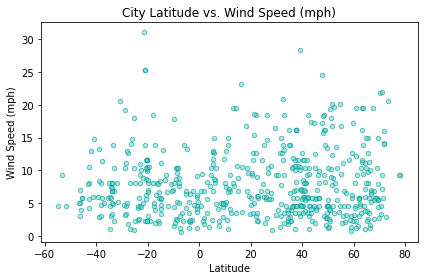

In [19]:
#Create the Scatter Plot for Latitude vs. Wind Speed
weather_data.plot(kind='scatter', x ='Lat', y='Wind Speed', marker='o', color='turquoise', 
                  edgecolor='teal', alpha=0.5)

#Define Labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph)")

plt.tight_layout()

#Save the plot as a .png
plt.savefig("../Images/Latitude_WindSpeed.png")

This scatter plot analyzes the relationship between Latitude and Wind Speed for the list of cities. There does not appear to be any relationship between Latitude and Wind Speed based upon this image. 

## Linear Regression

In [49]:
#Create DataFrames for Northern Hemisphere & Southern Hemisphere respectively for Analysis.
northern_hemisphere_df = weather_data.loc[weather_data['Lat']>=0]

southern_hemisphere_df = weather_data.loc[weather_data['Lat']<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

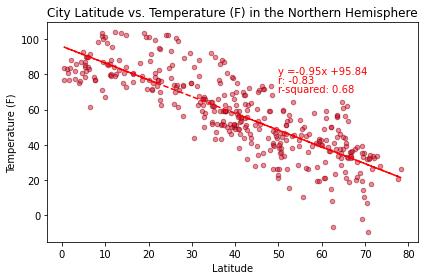

In [45]:
#Creating a Scatter Plot for the Northern Hemisphere - Max Temp vs. Latitude 
northern_hemisphere_df.plot(kind='scatter', x='Lat', y='Max Temp', marker='o', color='crimson', 
                            edgecolor='darkred', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Temperature (F) in the Northern Hemisphere")
plt.tight_layout()

#Perform the Linear Regression
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
r_squared_value = rvalue**2

#Plot the Linear Regression Line, Equation, Pearson's R & R-Squared Value
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (50,80), fontsize=10, color = 'red')
plt.annotate(f'r: {round(rvalue,2)}', (50, 75), fontsize=10, color='red')
plt.annotate(f'r-squared: {round(r_squared_value,2)}', (50,70), fontsize=10, color='red')

#Export Image to Images Folder
plt.savefig("../Images/NorthernHemisphere_Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

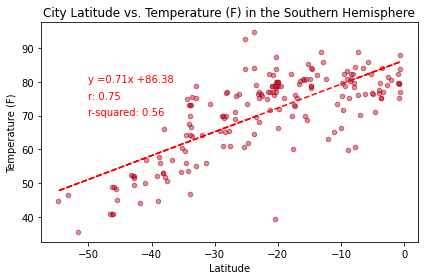

In [44]:
#Creating a Scatter Plot for the Southern Hemisphere - Max Temp vs. Latitude 
southern_hemisphere_df.plot(kind='scatter', x='Lat', y='Max Temp', marker='o', color='crimson', 
                            edgecolor='darkred', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Temperature (F) in the Southern Hemisphere")
plt.tight_layout()

#Perform the Linear Regression
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
r_squared_value = rvalue**2

#Plot the Linear Regression Line, Equation, Pearson's R & R-Squared Value
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (-50,80), fontsize=10, color = 'red')
plt.annotate(f'r: {round(rvalue,2)}', (-50, 75), fontsize=10, color='red')
plt.annotate(f'r-squared: {round(r_squared_value,2)}', (-50,70), fontsize=10, color='red')

#Export Image to Images Folder
plt.savefig("../Images/SouthernHemisphere_Temp.png")

Analysis:

The scatter plot for the Northen Hemisphere shows a very strong negative correlation between Latitude and Temperature (F), with a Pearson's R of -0.83. This means that as a city moves further North away from the equator (Latitude increases), the Temperature decreases. The R-squared value for this relationship is 0.68, meaning that for our dataset of cities, 68% of the variability in Temperature (F) is determined by Latitude in the Northern Hemisphere. 

The scatter plot for the Southern Hemisphere shows a strong posivite correlation between Latitude and Temperature (F), with a Pearson's R of 0.75. This means that as a city moves further further North towards the equator (Latitude increases), the Temperature increases. The R-squared value for this relationship is 0.56, meaning that for our dataset of cities, 56% of the variability in Tempearture (F) is determined by Latitude in the Southern Hemisphere. 

It is worth noting that the list of cities generated above did include a higher number of locations in the Northern Hemisphere. The Northern Hemisphere dataframe had 375 cities. The Southern Hemisphere dataframe had 183 cities. It stands to reason that this discrepency in sample size is the reason the Northen Hemisphere data exhibited a stronger relationship than the Southern Hemisphere data. If more cities were added to the Southern Hemisphere data set, it would be likely that the relationship between Latitude and Temperature (F) would grow stronger. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

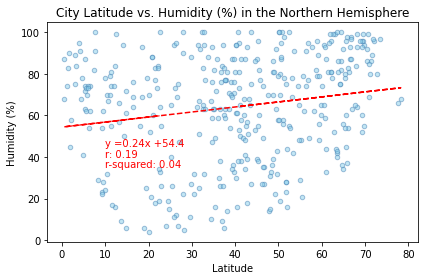

In [53]:
#Creating a Scatter Plot for the Northern Hemisphere - Humidity vs. Latitude 
northern_hemisphere_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', color='skyblue', 
                            edgecolor='steelblue', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) in the Northern Hemisphere")
plt.tight_layout()

#Perform the Linear Regression
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
r_squared_value = rvalue**2

#Plot the Linear Regression Line, Equation, Pearson's R & R-Squared Value
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (10,45), fontsize=10, color = 'red')
plt.annotate(f'r: {round(rvalue,2)}', (10, 40), fontsize=10, color='red')
plt.annotate(f'r-squared: {round(r_squared_value,2)}', (10,35), fontsize=10, color='red')

#Export Image to Images Folder
plt.savefig("../Images/NorthernHemisphere_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

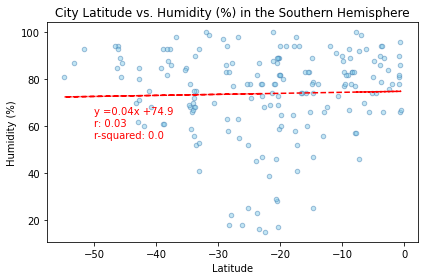

In [55]:
#Creating a Scatter Plot for the Southern Hemisphere - Humidity vs. Latitude 
southern_hemisphere_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', color='skyblue', 
                            edgecolor='steelblue', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) in the Southern Hemisphere")
plt.tight_layout()

#Perform the Linear Regression
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
r_squared_value = rvalue**2

#Plot the Linear Regression Line, Equation, Pearson's R & R-Squared Value
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (-50,65), fontsize=10, color = 'red')
plt.annotate(f'r: {round(rvalue,2)}', (-50, 60), fontsize=10, color='red')
plt.annotate(f'r-squared: {round(r_squared_value,2)}', (-50,55), fontsize=10, color='red')

#Export Image to Images Folder
plt.savefig("../Images/SouthernHemisphere_Humidity.png")

Analysis:

Neither of the above scatter plots, depicicting the relationship between Latitude and Humidity (%) in the Northern and Southern Hemispheres respectively, shows any indication of a statistically significant relationship existing. There is a very weak positive correlation in the Northern Hemisphere, however the R-squared value is negligible. The positive correlation is even weaker in the Southern Hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

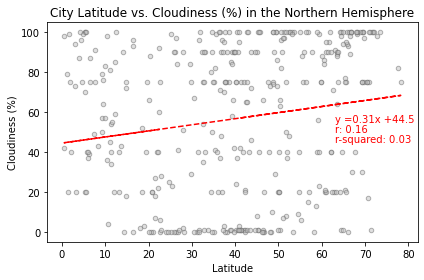

In [63]:
#Creating a Scatter Plot for the Northern Hemisphere - Cloudiness vs. Latitude 
northern_hemisphere_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', color='silver', 
                            edgecolor='dimgrey', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%) in the Northern Hemisphere")
plt.tight_layout()

#Perform the Linear Regression
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
r_squared_value = rvalue**2

#Plot the Linear Regression Line, Equation, Pearson's R & R-Squared Value
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (63,55), fontsize=10, color = 'red')
plt.annotate(f'r: {round(rvalue,2)}', (63, 50), fontsize=10, color='red')
plt.annotate(f'r-squared: {round(r_squared_value,2)}', (63,45), fontsize=10, color='red')

#Export Image to Images Folder
plt.savefig("../Images/NorthernHemisphere_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

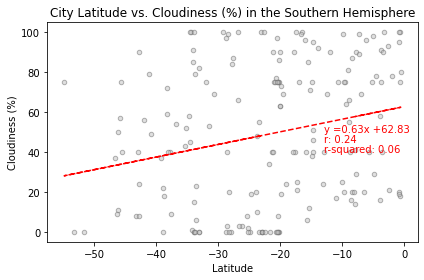

In [67]:
#Creating a Scatter Plot for the Southern Hemisphere - Cloudiness vs. Latitude 
southern_hemisphere_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', color='silver', 
                            edgecolor='dimgrey', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%) in the Southern Hemisphere")
plt.tight_layout()

#Perform the Linear Regression
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
r_squared_value = rvalue**2

#Plot the Linear Regression Line, Equation, Pearson's R & R-Squared Value
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (-13,50), fontsize=10, color = 'red')
plt.annotate(f'r: {round(rvalue,2)}', (-13, 45), fontsize=10, color='red')
plt.annotate(f'r-squared: {round(r_squared_value,2)}', (-13,40), fontsize=10, color='red')

#Export Image to Images Folder
plt.savefig("../Images/SouthernHemisphere_Cloudiness.png")

Analysis:

As with the analysis between Latitude and Humidity above, the relationships shown by the above scatter plots for Latitude vs. Cloudiness (%) in the Northern and Southern Hemispheres shows little to no correlation. There is a very weak positive correlation present between Latitude and Cloudiness (%) in the Northen Hemisphere with a Pearson's R of 0.16 and an R-squared value of 0.03. Meaning that while Cloudiness (%) does increase as Latitude increases, it is not a statistically significant relationship. 

In the Southern Hemisphere, the positive correlation between Latitude and Cloudiness (%) does become stronger than in the Northern Hemisphere, but remains weak. The Pearson's R for this relationship is 0.24 and the R-squared value is 0.06. It is interesting to note that though the positive correlation itself became stronger, the percentage of variability contributed to this relationship became smaller. This could mean that other external factors are at play, causing this relationship to appear stronger than it is. This is a great example of correlation not equating to causation. 

Additionally, this is the first time we see the Southern Hemisphere having a stronger correlation than the Northern Hemisphere in our analysis.  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

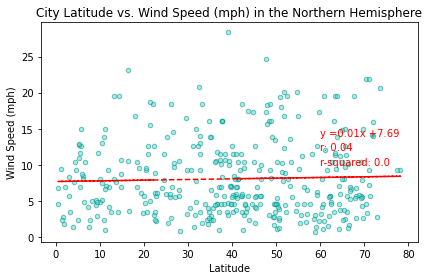

In [71]:
#Creating a Scatter Plot for the Northern Hemisphere - Wind Speed vs. Latitude 
northern_hemisphere_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', color='turquoise', 
                            edgecolor='teal', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph) in the Northern Hemisphere")
plt.tight_layout()

#Perform the Linear Regression
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
r_squared_value = rvalue**2

#Plot the Linear Regression Line, Equation, Pearson's R & R-Squared Value
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (60,14), fontsize=10, color = 'red')
plt.annotate(f'r: {round(rvalue,2)}', (60, 12), fontsize=10, color='red')
plt.annotate(f'r-squared: {round(r_squared_value,2)}', (60,10), fontsize=10, color='red')

#Export Image to Images Folder
plt.savefig("../Images/NorthernHemisphere_WindSpeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

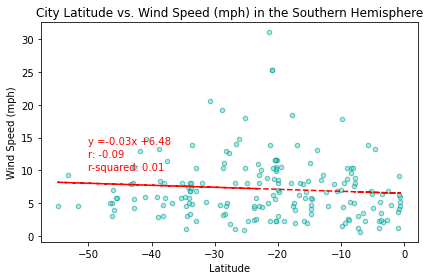

In [73]:
#Creating a Scatter Plot for the Southern Hemisphere - Wind Speed vs. Latitude 
southern_hemisphere_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', color='turquoise', 
                            edgecolor='teal', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph) in the Southern Hemisphere")
plt.tight_layout()

#Perform the Linear Regression
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
r_squared_value = rvalue**2

#Plot the Linear Regression Line, Equation, Pearson's R & R-Squared Value
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (-50,14), fontsize=10, color = 'red')
plt.annotate(f'r: {round(rvalue,2)}', (-50, 12), fontsize=10, color='red')
plt.annotate(f'r-squared: {round(r_squared_value,2)}', (-50,10), fontsize=10, color='red')

#Export Image to Images Folder
plt.savefig("../Images/SouthernHemisphere_WindSpeed.png")

Analysis:

Neither of the above scatter plots, depicicting the relationship between Latitude and Wind Speed (mph) in the Northern and Southern Hemispheres respectively, shows any indication of a statistically significant relationship existing. There is a very weak positive correlation in the Northern Hemisphere and a very weak negative correlation in the Southern Hemisphere, but neither of these relationships is worth mentioning. 